# objective of automobile milege prediction project:

build a predictive modeling algorithm to predict milege of cars based on given iput variables.

In [1]:
# import libraries
#for data preperation and analysis
import pandas as pd

# for creating plot
import matplotlib.pyplot as plt

#for distribution plot and heatmap
import seaborn as sns

#for craeting training and test samples
from sklearn.model_selection import train_test_split

#feature selection(to select significant variables)
from sklearn.feature_selection import SelectKBest,f_regression

#for building linear regression model
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"C:\Users\naimu\Softroniics\automobile_data.csv")

In [3]:
df.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,2015,1,buick
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth
3,16.0,8,304.0,150,3433,12.0,2015,1,amc
4,17.0,8,302.0,140,3449,10.5,2015,1,ford


In [4]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_year', 'Origin', 'Car_Name'],
      dtype='object')

# Variable Description
* target variable(y):MPG(milege per galion)
* independent variable(x)
    * cylinders
    * displacement
    * horsepower
    * weight
    * acceleration
    * model_year
    * car_name

In [5]:
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
393,27.0,4,140.0,86,2790,15.6,2003,1,ford
394,44.0,4,97.0,52,2130,24.6,2003,2,volkswagen
395,32.0,4,135.0,84,2295,11.6,2003,1,dodge
396,28.0,4,120.0,79,2625,18.6,2003,1,ford
397,31.0,4,119.0,82,2720,19.4,2003,1,chevrolet


In [6]:
df.shape

(398, 9)

In [7]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [8]:
### horse power is numerical variable but in the df it is stored as categrised. so we need to change the data type of horse power.it will deside whether it is an integer or float
df["Horsepower"] =pd.to_numeric(df["Horsepower"],errors = "coerce")

In [9]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [10]:
# descriptive statistics
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.489447,5.454774,193.425879,104.469388,2970.424623,15.568090,2008.989950,1.572864
std,7.849757,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,8.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,2003.000000,1.000000
25%,17.125000,4.000000,104.250000,75.000000,2223.750000,13.825000,2006.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,2009.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,2012.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,2015.000000,3.000000


In [11]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64

In [12]:
# there are 6 missing values in hprsepower variables
df["Horsepower"]= df["Horsepower"].fillna(df["Horsepower"].median())

In [13]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64

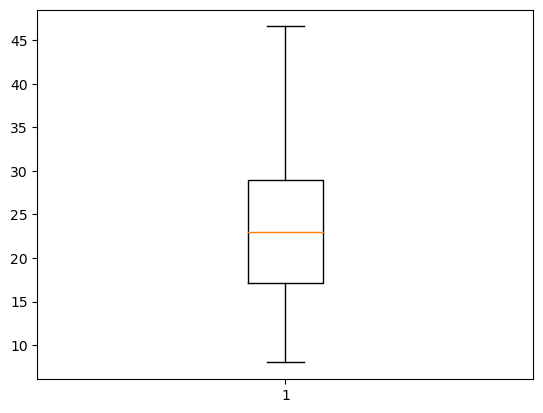

In [14]:
# check outlier in numeric colum
plt.boxplot(df["MPG"]) # no outlier
plt.show()

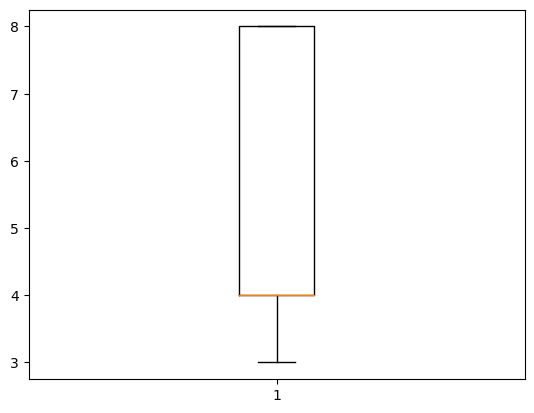

In [15]:
plt.boxplot(df["Cylinders"]) # no outlier
plt.show()

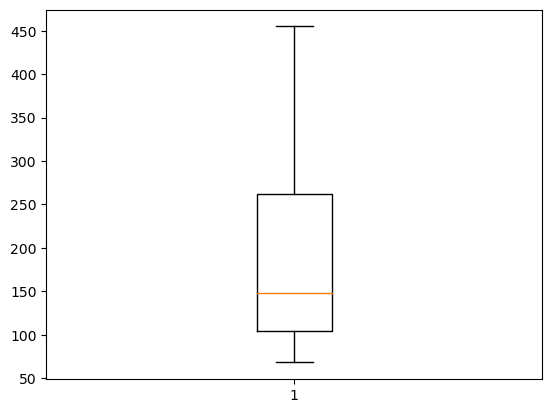

In [16]:
plt.boxplot(df["Displacement"]) # no outlier
plt.show()

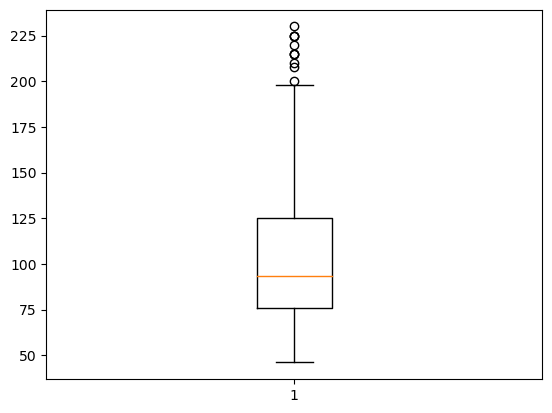

In [17]:
plt.boxplot(df["Horsepower"]) # no outlier
plt.show()

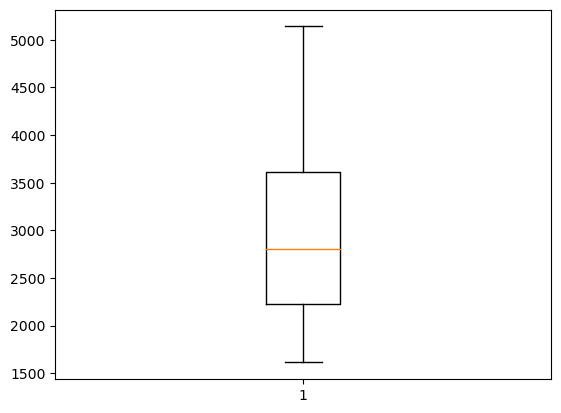

In [18]:
plt.boxplot(df["Weight"]) # no outlier
plt.show()

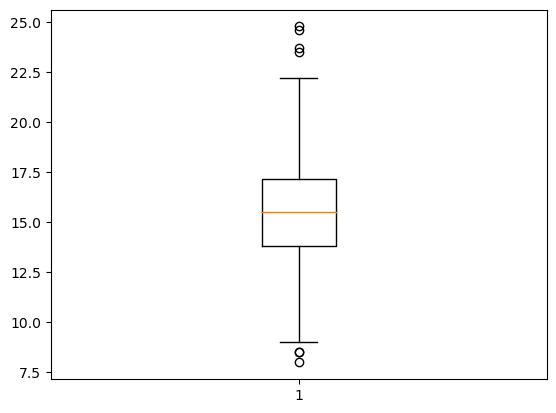

In [19]:

plt.boxplot(df["Acceleration"]) # no outlier
plt.show()

In [20]:
def remove_outlier(d,c):
    # where d is the variable for dataframe and c is the variable for column
    
    #find q1 and q2
    q1 = d[c].quantile(0.25)
    q3 = d[c].quantile(0.75)
    
    # calculate iqr(inter quartile range)
    iqr = q3-q1
    
    # find upper bound(ub) and lower bound(lb)
    ub =q3 +1.5*iqr
    lb =q1 -1.5*iqr
    
    # filter good data (ie eliminate outliers)
    data_without_outlier = d[(d[c]<=ub) & (d[c]>=lb)]
    
    return data_without_outlier

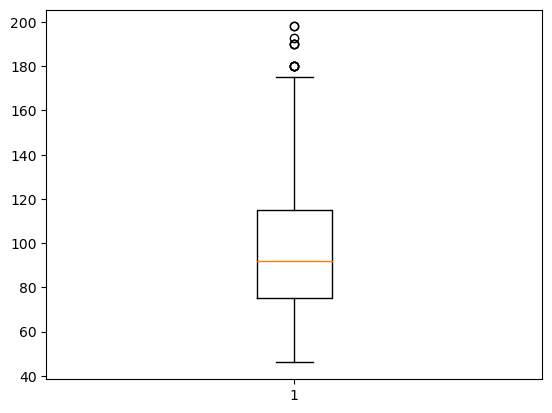

In [21]:
#remove outlier from horsepower variable
df = remove_outlier(df,"Horsepower")

plt.boxplot(df["Horsepower"])
plt.show()

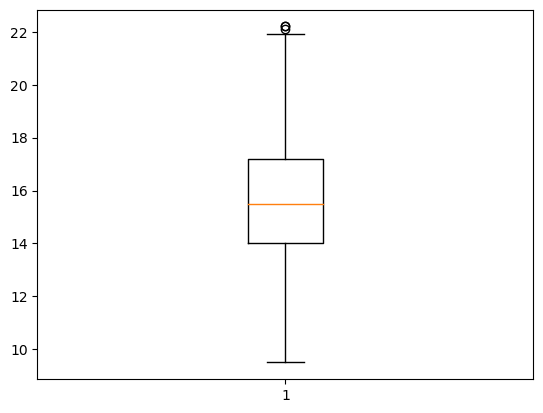

In [22]:
#remove outlier from horsepower variable
df = remove_outlier(df,"Acceleration")

plt.boxplot(df["Acceleration"])
plt.show()

# EDA 

    * DISTRIBUTION 
    * DATA MIX
    *CORRELATION

In [23]:
df.columns # checking the data using eda

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_year', 'Origin', 'Car_Name'],
      dtype='object')

In [24]:
df.shape

(381, 9)

C:\Users\naimu\AppData\Local\Temp\ipykernel_19960\4249997888.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MPG"])


<Axes: xlabel='MPG', ylabel='Density'>

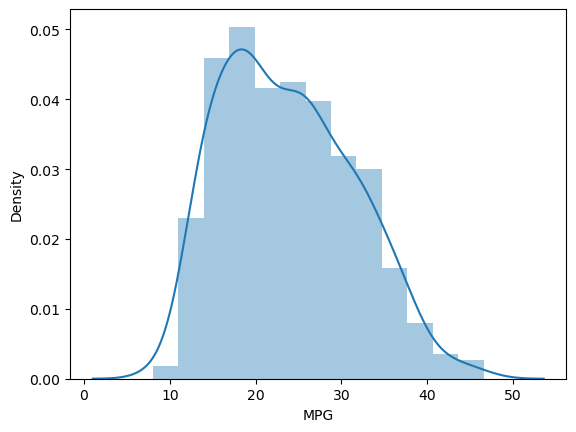

In [25]:
sns.distplot(df["MPG"])

C:\Users\naimu\AppData\Local\Temp\ipykernel_19960\4249997888.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MPG"])


<Axes: xlabel='MPG', ylabel='Density'>

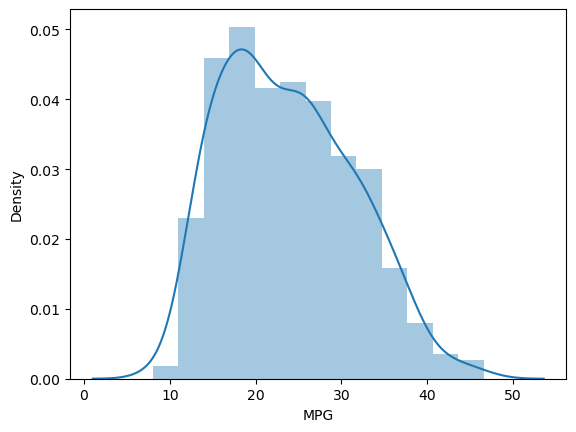

In [26]:
sns.distplot(df["MPG"])

C:\Users\naimu\AppData\Local\Temp\ipykernel_19960\4018351918.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Cylinders"])


<Axes: xlabel='Cylinders', ylabel='Density'>

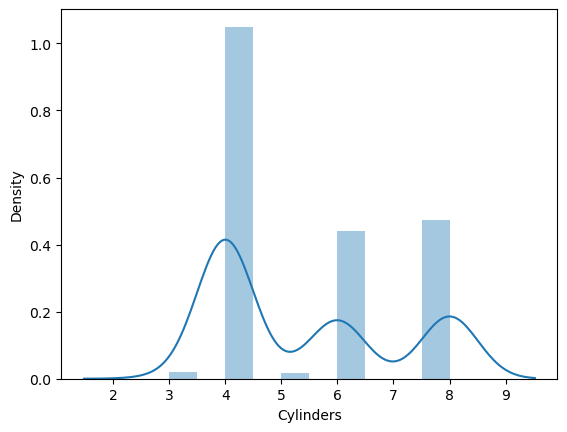

In [27]:
sns.distplot(df["Cylinders"])

C:\Users\naimu\AppData\Local\Temp\ipykernel_19960\193703247.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Displacement"])


<Axes: xlabel='Displacement', ylabel='Density'>

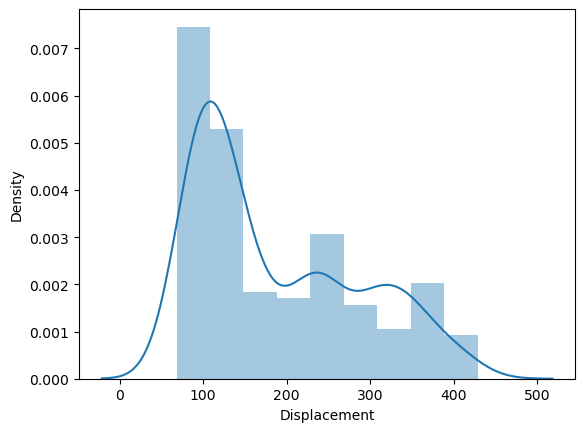

In [28]:
sns.distplot(df["Displacement"])

C:\Users\naimu\AppData\Local\Temp\ipykernel_19960\1234802994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Horsepower"])


<Axes: xlabel='Horsepower', ylabel='Density'>

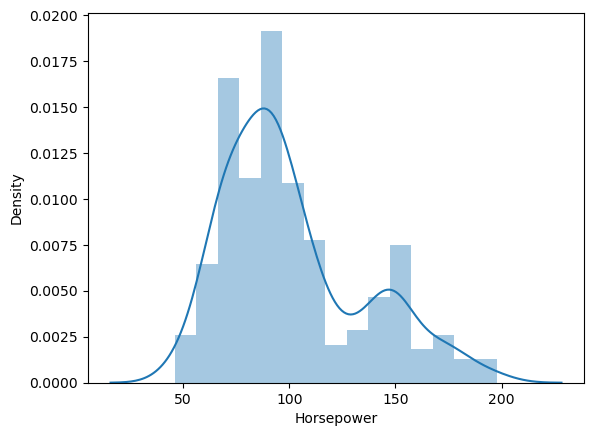

In [29]:
sns.distplot(df["Horsepower"])

C:\Users\naimu\AppData\Local\Temp\ipykernel_19960\196129849.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"])


<Axes: xlabel='Weight', ylabel='Density'>

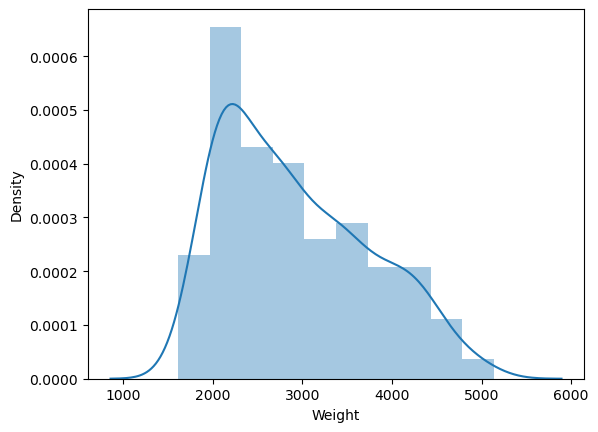

In [30]:
sns.distplot(df["Weight"])

C:\Users\naimu\AppData\Local\Temp\ipykernel_19960\1200216170.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Acceleration"])


<Axes: xlabel='Acceleration', ylabel='Density'>

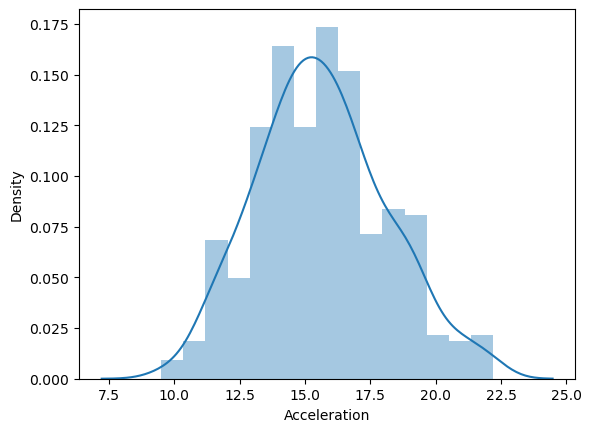

In [31]:
sns.distplot(df["Acceleration"])

In [32]:
# check data mix for categorical variables
# Cylindrer,Model_year,Car_name

<Axes: xlabel='Cylinders'>

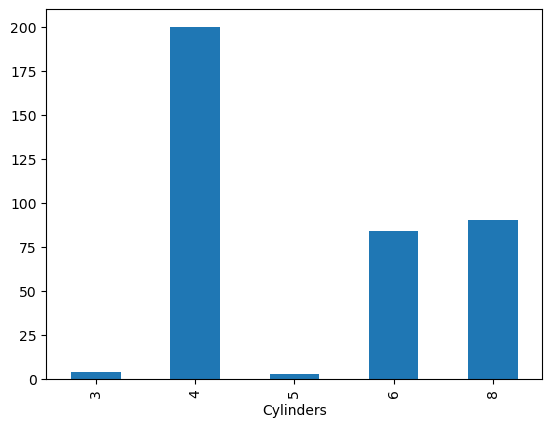

In [33]:
df.groupby("Cylinders")["Cylinders"].count().plot(kind = "bar")

<Axes: xlabel='Model_year'>

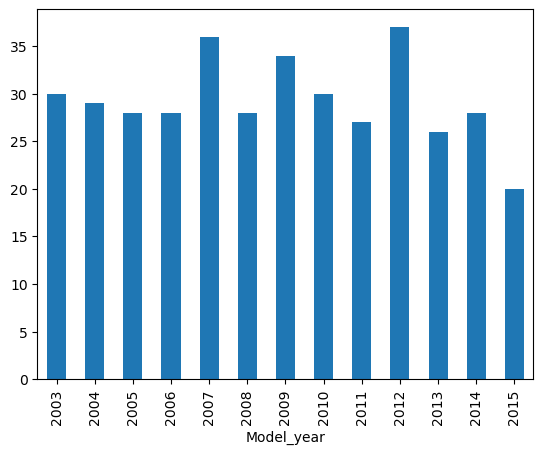

In [34]:
df.groupby("Model_year")["Model_year"].count().plot(kind = "bar")

<Axes: xlabel='Origin'>

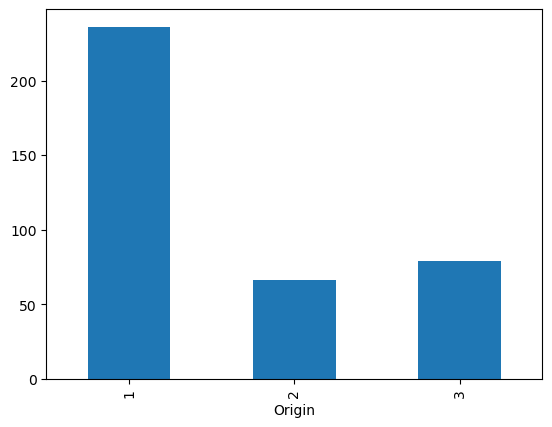

In [35]:
df.groupby("Origin")["Origin"].count().plot(kind = "bar")

<Axes: xlabel='Car_Name'>

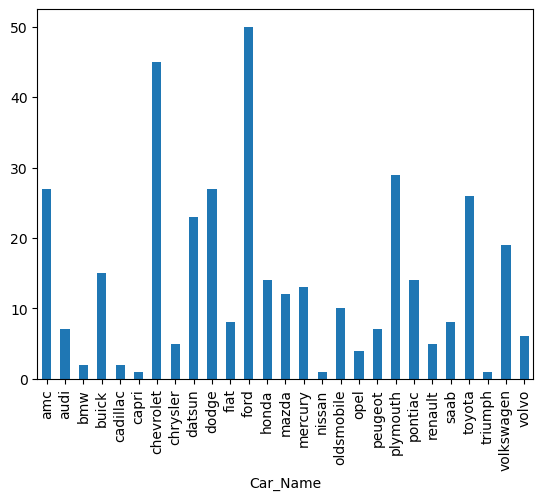

In [36]:
df.groupby("Car_Name")["Car_Name"].count().plot(kind = "bar")

# pearson correlation

In [37]:
#create a set of numeric columns
df_numeric = df.select_dtypes(include = ["int64","float64"])
df_numeric.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin
0,8.0,8,307.0,130.0,3504,12.0,2015,1
1,15.0,8,350.0,165.0,3693,11.5,2015,1
2,18.0,8,318.0,150.0,3436,11.0,2015,1
3,16.0,8,304.0,150.0,3433,12.0,2015,1
4,17.0,8,302.0,140.0,3449,10.5,2015,1


In [38]:
# n df_numeric we have categorical variable. we needed to drop that
df_numeric = df_numeric.drop(["Cylinders","Model_year","Origin"],axis = 1)
df_numeric.head()

,MPG,Displacement,Horsepower,Weight,Acceleration
0,8.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5


<Axes: >

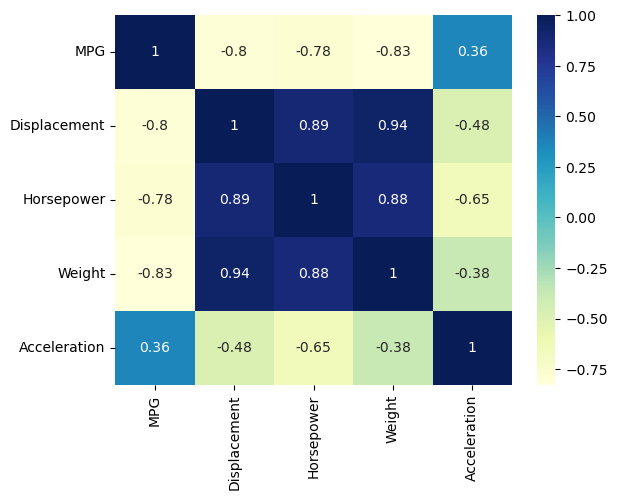

In [39]:
# create heat map 
sns.heatmap(df_numeric.corr(),cmap ="YlGnBu",annot =True)

In [40]:
# using the pearson correlation test we found that key drivers(input variables)

------------------------End of EDA-------------------------

In [41]:
# check if there is any problem in categorical variables.
#like spelling difference,case sensitive value ie,Male,male

In [42]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_year', 'Origin', 'Car_Name'],
      dtype='object')

In [43]:
df["Cylinders"].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [44]:
df["Model_year"].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003], dtype=int64)

In [45]:
df["Origin"].unique()
# origin 1 US,2 Germany,3 Japan

array([1, 3, 2], dtype=int64)

In [46]:
df["Car_Name"].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'dodge', 'toyota',
       'datsun', 'volkswagen', 'peugeot', 'audi', 'saab', 'bmw', 'honda',
       'pontiac', 'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler',
       'mazda', 'volvo', 'renault', 'capri', 'cadillac', 'triumph',
       'nissan'], dtype=object)

# dummy conversion(one-hot ending)

In [49]:
# changing categorical value into numeric through dummy conversion
# ml algorithm is a mathematical equation
# we cant substitute text data into a mathematical equation.
#hence we are transforming text data to numeric

# remove model year as it doesnot signify anything in terms of impact on target variable
df = df.drop("Model_year",axis=1)

In [51]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Origin            int64
Car_Name         object
dtype: object

In [52]:
# cylinders and origin are ctegorical variable stored as numeric.
# hence we need to change the datatype of variables to object
df["Cylinders"]=df["Cylinders"].astype("object")
df["Origin"] = df["Origin"].astype("object")
df.dtypes

MPG             float64
Cylinders        object
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Origin           object
Car_Name         object
dtype: object

In [53]:
# create a new df to store categorical variable for dummy covertion
df_categorical = df.select_dtypes(include ="object")
df_categorical.head()

,Cylinders,Origin,Car_Name
0,8,1,chevrolet
1,8,1,buick
2,8,1,plymouth
3,8,1,amc
4,8,1,ford


In [54]:
# dummy convertion
# we drop 1st index for removing dependence of independent variable(multicolinearity)
df_dummy = pd.get_dummies(df_categorical,drop_first=True)
df_dummy.head()

,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_2,Origin_3,Car_Name_audi,Car_Name_bmw,Car_Name_buick,Car_Name_cadillac,...,Car_Name_opel,Car_Name_peugeot,Car_Name_plymouth,Car_Name_pontiac,Car_Name_renault,Car_Name_saab,Car_Name_toyota,Car_Name_triumph,Car_Name_volkswagen,Car_Name_volvo
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
#combine data from df_numeric and df_dummy
df_final = pd.concat([df_numeric,df_dummy],axis = 1)
df_final.head()

,MPG,Displacement,Horsepower,Weight,Acceleration,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_2,...,Car_Name_opel,Car_Name_peugeot,Car_Name_plymouth,Car_Name_pontiac,Car_Name_renault,Car_Name_saab,Car_Name_toyota,Car_Name_triumph,Car_Name_volkswagen,Car_Name_volvo
0,8.0,307.0,130.0,3504,12.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,350.0,165.0,3693,11.5,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,318.0,150.0,3436,11.0,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,16.0,304.0,150.0,3433,12.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,302.0,140.0,3449,10.5,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
# create x and y 

x = df_final.drop("MPG",axis = 1)

y = df_final["MPG"]

In [57]:
# from sklearn,feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
# testing and test sample
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.3,random_state=999)


In [59]:
#check sample size
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(266, 36) (115, 36) (266,) (115,)


# FEATURE SELECTION

select significant variables

In [60]:
# p value to test the significance of the hypothetical mechanism.
#p value of variable <0.05 significant,confidence is 95%
#VIF factor tells you how expencive(non relevent) that variable, how useless it is,
# we choose small vif.

In [61]:
#VIF (variable inflation factor) it is a score thet tells as the relevency of a variable.
#along with p value we also check VIF ti find the significant variable.
#VIF = 1/(1-r^2)
#p value:measure the strength of evidence against null hypothesis.
#a variable with p value < 0.05 is considered as significant variable.
# while finding the significant variables manually we should also chack VIF score

In [62]:
#craete a key_features object to select the top k features

key_features = SelectKBest(score_func = f_regression,k = 5) # to select 5 significant features

#fit the key features of training data and transform it
xtrain_selected = key_features.fit_transform(xtrain,ytrain)

selected_indices = key_features.get_support(indices =True)

selected_features = xtrain.columns[selected_indices]



In [63]:
#print the significant variables
selected_features

Index(['Displacement', 'Horsepower', 'Weight', 'Cylinders_4', 'Cylinders_8'], dtype='object')

# Build Linear Regression Model

In [64]:
# instantiate the linear regression function
linreg= LinearRegression()

# fit the model using training sample
linreg.fit(xtrain_selected,ytrain)

#print the accuracy of training model(Rsquared value)
linreg.score(xtrain_selected,ytrain)

0.72125780050005

In [65]:
# evaluate the model on the test set using the selected features
xtest_selected = xtest.iloc[:,selected_indices]
score = linreg.score(xtest_selected,ytest)
score

#the resulting score variable contains the r -squared score of the linear regression model on the test set using the selected features

C:\Users\naimu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.734230411683308

In [66]:
#predict milege based on xtest
predicted_mpg = linreg.predict(xtest_selected)

C:\Users\naimu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [67]:
#print predicted milege
print(predicted_mpg)

[13.44818911 31.43196382 28.44591081 20.74218459 22.61222329 28.94812662
 19.33647408 17.43382154 25.84962273 26.78190825 21.12704305 33.14903287
 33.45118793 23.77442667 27.82810635 29.84593131 22.41009316 25.12838625
 21.89970859 20.92367708 31.4843043  19.73134492 26.38739134 30.8240612
 14.92824698 15.12905251 27.43084899 17.08249757 31.70220551 18.41811622
 30.74587082 18.21535019 12.91764829 27.40011844 21.75103287 28.38793937
 11.70334409 15.90948232 27.19193795 26.71992423 19.00334325 22.09896203
 28.31776754 18.61742129 27.19941837 19.89224563 32.8508106  15.95364867
 18.85714186 30.63189765 16.3778875  21.11840658 15.41763865 18.5179614
 28.48427612 27.77114489 13.11621492 27.39144553 29.2371986  11.28151144
 26.19866318 19.62485372 29.82116981 29.13211328 29.8058844  16.9505793
 33.112493   31.47852467 17.98836416 20.91452679 18.11135188 16.31580522
 17.40255452 32.60084721 31.03234993 32.44966876 16.1367137  21.63753432
 17.44088253 30.1170789  21.56164069 11.29717705 21.42

In [68]:
#print B0(beta not=intercept)
linreg.intercept_

43.300669031949795

In [69]:
#print beta values
linreg.coef_

array([ 0.0042655 , -0.08068206, -0.0049523 ,  3.05983048,  3.12359661])